In [4]:
#+++ версия 2020.09.21 инициализация посредством global init()
from importlib import reload
import adds
adds = reload(adds)
from adds import * # import adds functions

init()

ii(dfr)
# read_rmsp()

[  0.00   ₀.₀]19:21:31 ₂₀₂₁₋₁₂₋₀₁  init()


,1,2,3,4,5,6,7,8,9,10
0,HTML,Path,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__,__spec__
1,_log,_o,adds,datetime,df_info,dfr,disp,display,glob,gmtime
2,grpp,ii,init,isfile,join,l,listdir,math,merge_OKVED,np
3,os,pd,read_rmsp,reload,requests,shutil,sizeof_fmt,start,strftime,time
4,tm,tmpxls,xl_rowcol_to_cell,xlspcl,zipfile,-,-,-,-,-


,name,rows,cols,memory,keys


In [46]:
fname = r'C:\!HML\03.Services\04.MTA\SpeedMap\speed_week_2185.csv'

df =  pd.read_csv(fname, sep=',')

print(df.count())

dfr['speed'] = df

df = df[df['latitude'] != 0]

df.count()

dfr['split'] = np.array_split(df, 10)

[d.count() for d in  dfr['split']]

n = 0

for d in  dfr['split']:
    n+=1
    fn = r'C:\_dev\gpx_reg\app\geodata\mta-speed\speed_'+str(n)+'.csv'
    tm(n)
    d.to_csv(fn)    

device_id    3835234
unixtime     3835234
latitude     3835234
longitude    3835234
speed        3835234
dtype: int64
[2521.43₂₆₃₉.₈]20:05:31 ₂₀₂₁₋₁₂₋₀₁  1
[  1.77₂₆₄₁.₆]20:05:33 ₂₀₂₁₋₁₂₋₀₁  2
[  1.73₂₆₄₃.₃]20:05:34 ₂₀₂₁₋₁₂₋₀₁  3
[  1.86₂₆₄₅.₂]20:05:36 ₂₀₂₁₋₁₂₋₀₁  4
[  2.00₂₆₄₇.₂]20:05:38 ₂₀₂₁₋₁₂₋₀₁  5
[  1.78₂₆₄₉.₀]20:05:40 ₂₀₂₁₋₁₂₋₀₁  6
[  1.99₂₆₅₁.₀]20:05:42 ₂₀₂₁₋₁₂₋₀₁  7
[  1.72₂₆₅₂.₇]20:05:44 ₂₀₂₁₋₁₂₋₀₁  8
[  1.76₂₆₅₄.₄]20:05:45 ₂₀₂₁₋₁₂₋₀₁  9
[  1.97₂₆₅₆.₄]20:05:47 ₂₀₂₁₋₁₂₋₀₁  10


In [47]:
df = dfr['speed']

df['lat'] = df['latitude'].round(4)
df['lon'] = df['longitude'].round(4)

df.groupby(pd.cut(df['speed'],[0,10,90,95,100,110,120,124,125,126,127,150]))['device_id'].count()

speed
(0, 10]             0
(10, 90]            0
(90, 95]       846941
(95, 100]      764023
(100, 110]    1194320
(110, 120]     730617
(120, 124]     193455
(124, 125]      38906
(125, 126]      35110
(126, 127]      31862
(127, 150]          0
Name: device_id, dtype: int64

In [36]:
df.keys()

Index(['device_id', 'unixtime', 'latitude', 'longitude', 'speed', 'lat',
       'lon'],
      dtype='object')

In [48]:
df = dfr['speed']

df['lat'] = df['latitude'].round(3)
df['lon'] = df['longitude'].round(3)

print (df.shape[0])

df = df[df['speed']>125]

print (df.shape[0])

df = df.drop_duplicates(subset=['lat'])

print (df.shape[0])

df[['lat','lon','speed']].sample(2000).to_csv(r'C:\_dev\gpx_reg\app\geodata\mta-speed\speed_120.csv')

3835234
66972
14977


In [327]:
fpath = r'C:\_dev\node_cookie\ping_result.txt'
tm()
d = 'ping'

names = ['time']+ ["p"+str(i) for i in range(1,16)]

df =  pd.read_csv(fpath, sep='\t', header=None ,names=names)

df['datetime'] = pd.to_datetime(df['time'])

dfr[d] = df

tm (df.info())
df[:3]

*** Start at: 18:47:23 ₂₀₂₁₋₁₁₋₂₆  ************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   time      687 non-null    object             
 1   p1        687 non-null    int64              
 2   p2        687 non-null    int64              
 3   p3        687 non-null    int64              
 4   p4        687 non-null    int64              
 5   p5        687 non-null    int64              
 6   p6        687 non-null    int64              
 7   p7        687 non-null    int64              
 8   p8        687 non-null    int64              
 9   p9        687 non-null    int64              
 10  p10       687 non-null    int64              
 11  p11       687 non-null    int64              
 12  p12       687 non-null    int64              
 13  p13       684 non-null    flo

,time,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,datetime
0,2021-11-26T11:21:00.165Z,5,9,5,7,12,8,6,6,8,7,6,5,12.0,7.0,NaN,2021-11-26 11:21:00.165000+00:00
1,2021-11-26T11:21:10.170Z,12,9,8,15,7,7,11,11,7,8,5,5,15.0,9.0,NaN,2021-11-26 11:21:10.170000+00:00
2,2021-11-26T11:21:20.196Z,7,5,10,8,7,7,8,5,8,21,10,5,21.0,8.0,NaN,2021-11-26 11:21:20.196000+00:00


In [226]:
df = dfr['ping'][20:30]
df

,time,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15
20,2021-11-26T11:24:20.200Z,6,13,11,7,6,10,11,8,7,7,8,6,13.0,8.0,NaN
21,2021-11-26T11:24:30.156Z,7,7,6,16,9,5,6,7,5,7,6,5,16.0,7.0,NaN
22,2021-11-26T11:24:40.132Z,8,5,8,16,7,18,15,8,7,6,6,5,18.0,9.0,NaN
23,2021-11-26T11:24:50.152Z,6,11,25,14,7,6,7,8,6,7,6,6,25.0,9.0,NaN
24,2021-11-26T11:25:00.147Z,14,6,7,16,13,7,56,6,6,7,7,6,56.0,13.0,NaN
25,2021-11-26T11:25:10.157Z,10,6,9,12,6,7,6,9,13,7,6,6,13.0,8.0,NaN
26,2021-11-26T11:25:23.914Z,6,11,6,5,6,7,10,8,10,8,5,11,7.0,NaN,NaN
27,2021-11-26T11:25:30.141Z,6,6,5,11,8,9,8,6,8,9,7,5,11.0,7.0,NaN
28,2021-11-26T11:25:40.129Z,6,8,42,57,13,29,10,6,6,6,5,5,57.0,17.0,NaN
29,2021-11-26T11:25:50.168Z,6,5,7,7,15,7,6,8,5,7,9,5,15.0,7.0,NaN


In [184]:
df.loc[:,'p1':'p10'].keys()

Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'], dtype='object')

In [403]:
pd.Timestamp('now').floor('D') + pd.Timedelta(-1, unit='H')

pd.Timestamp('now').floor('H') + pd.Timedelta(-1, unit='H')


pd.Timestamp('now')



Timestamp('2021-11-29 10:33:05.207600')

In [442]:
a = datetime.now()
b = datetime.now() # after a few seconds
delta = a-b
delta.total_seconds()

<function datetime.date>

In [685]:
fpath = r'C:\_dev\node_cookie\ping_result.txt'

names = ['time']+ ["p"+str(i) for i in range(1,16)]
dfr['ping'] =  pd.read_csv(fpath, sep='\t', header=None ,names=names)
df = dfr['ping']  # [:1300]

start_date = (pd.Timestamp('now') - datetime.timedelta(hours=3) ).strftime('%Y-%m-%dT%H:%M:%S')
end_date = pd.Timestamp('now').strftime('%Y-%m-%dT%H:%M:%S') #'2021-11-29T14:20'

# print ( [start_date, end_date]  )

mask = (df['time'] > start_date) & (df['time'] <= end_date)
df = df.loc[mask]
df[:5]

,time,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15
751,2021-11-29T17:10:10.169,7,4,5,5,10,6,7,6,8,7,7,4,10.0,6.0,NaN
752,2021-11-29T17:20:10.194,6,9,6,9,7,6,9,8,6,7,15,6,15.0,8.0,NaN
753,2021-11-29T17:30:10.169,6,8,9,7,12,8,28,8,10,12,6,6,28.0,10.0,NaN
754,2021-11-29T17:40:10.165,7,6,7,8,11,22,6,8,15,12,7,6,22.0,9.0,NaN
755,2021-11-29T17:50:10.277,24,35,12,25,14,24,33,32,42,23,21,12,42.0,25.0,NaN


In [696]:
def interval(df,hours):
   
    start_date = (pd.Timestamp('now') - datetime.timedelta(hours=hours)).strftime('%Y-%m-%dT%H:%M:%S')
    end_date = pd.Timestamp('now').strftime('%Y-%m-%dT%H:%M:%S') #'2021-11-29T14:20'

    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    
    df = df.loc[mask]

    print (start_date, end_date)
    
    return df

df = interval(dfr['ping'],60)

print ((pd.Timestamp('now')  - datetime.timedelta(hours=60)).strftime('%Y-%m-%dT%H:%M:%S'))


df.shape[0]

2021-11-27T08:12:46 2021-11-29T20:12:46
2021-11-27T08:12:46


63

*** Start at: 20:13:04 ₂₀₂₁₋₁₁₋₂₉  ************************************************************
2021-11-27T08:13:04 2021-11-29T20:13:04
[  0.60   ₀.₆]20:13:05 ₂₀₂₁₋₁₁₋₂₉  >>>


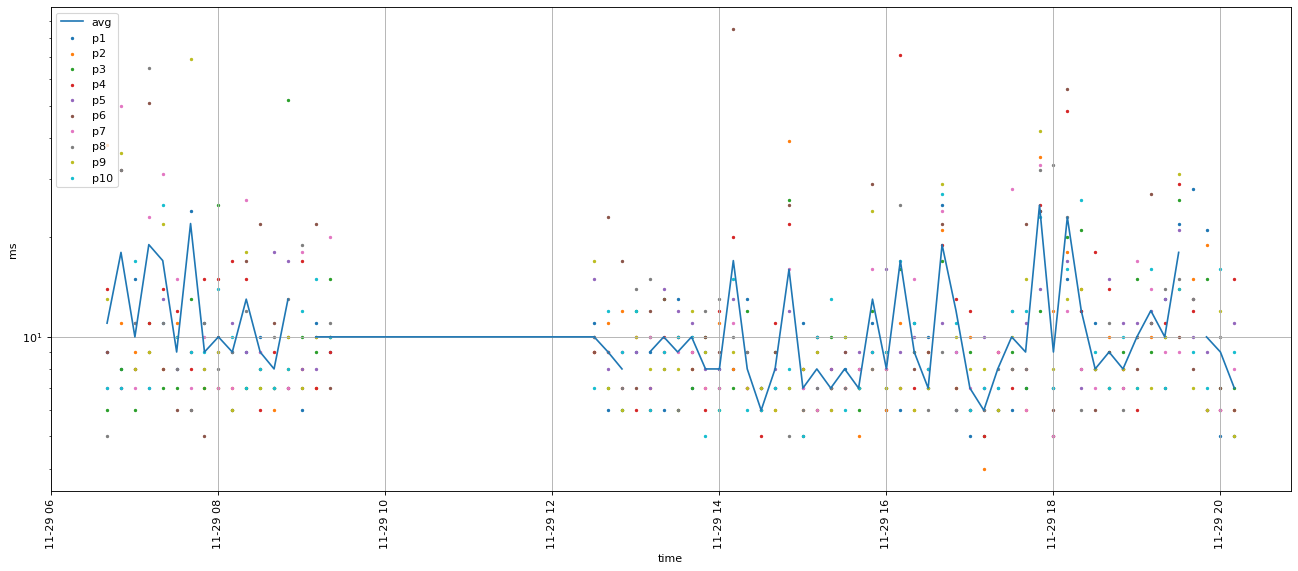

In [697]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.dates as mdates


tm()

fpath = r'C:\_dev\node_cookie\ping_result.txt'

d = 'ping'

names = ['time']+ ["p"+str(i) for i in range(1,16)]
dfr['ping'] =  pd.read_csv(fpath, sep='\t', header=None ,names=names)


df = dfr['ping']  # [:1300]
df['datetime'] = pd.to_datetime(df['time'])

df = interval(df,60)

# disp(df)

fig = figure(figsize=(20, 8), dpi=80)


# ax = fig.add_subplot(1, 1, 1)

for cl in df.loc[:,'p1':'p10'].keys():

    x,y = df['datetime'],df[cl]
    
    stack = df[cl] + df[cl].shift(1) + df[cl].shift(2)
    
    p = np.percentile(stack[stack.notna()].tolist(), 70)

    plt.scatter(x, y, s=col,  alpha=1, 
                label=str(cl))
    
    for a, b in zip(x, y):
#         print (mdates.date2num(a),b)
        ax.text(5, 100, "Independence Day")
        
        
        ax.annotate('Test', (10, b), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
    
#     for i, txt in enumerate(y):

#         if (txt > p):
#             print([x ,i,txt,p],end=',')
#             el = mpatches.Ellipse((i, txt), 50 ,10, angle=30, alpha=0.2)
#             plt.annotate('' + str(txt), 
#                          xy =(x[i], txt),
#                          xytext =(x[i-2], txt*1.3),
#                          arrowprops = dict(arrowstyle="fancy",
#                                             color="0.5",
#                                             patchB=el,
#                                             shrinkB=5,
#                                            connectionstyle="arc3,rad=0.1")
#                          )

plt.plot(x,df['p14'], label="avg")  
plt.yscale('log')

xtick = pd.date_range( start=df.datetime.min( ), end=df.datetime.max( ), freq='60s' )

# print (df.datetime.min( ),df.datetime.max( ), xtick)

plt.grid('on', which='major', axis='x' )
plt.grid('on', which='major', axis='y' )

ax.set_xticks(xtick)
ax.set_xticks(xtick, minor=True)
# ax.set_yticks(major_ticks) 
# ax.set_yticks(minor_ticks, minor=True)


plt.xlabel("time")
plt.ylabel("ms")
plt.legend(loc='upper left')
plt.xticks(rotation=90)
# plt.show()
tm('>>>')

In [372]:
import numpy as np
a = np.array([1,2,3,5,7,4,5,10,11,20])
p = np.percentile(a, 80) # return 50th percentile, e.g median.
# print (p)


for cl in df.loc[:,'p1':'p10'].keys():
    y = df[cl]   
    p = np.percentile(y, 99) 
    print(p)


27.980000000000018
46.0
30.980000000000018
95.98000000000002
48.960000000000036
33.960000000000036
26.980000000000018
25.980000000000018
42.0
26.960000000000036


In [373]:
y = df.loc[:,'p1':'p10'].stack().tolist()

p = np.percentile(y, 99) 
print(p)

45.0


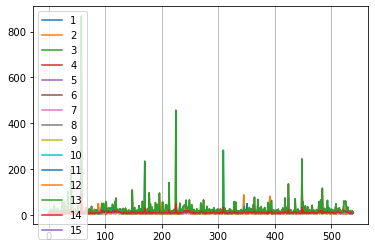

<Figure size 1600x880 with 0 Axes>

In [115]:
ax = ts.plot()
xtick = pd.date_range( start=ts.index.min( ), end=ts.index.max( ), freq='W' )
ax.set_xticks( xtick, minor=True )

figure(figsize=(20, 11), dpi=80)

ax.grid('on', which='minor', axis='x' )
ax.grid('off', which='major', axis='x' )

In [62]:
df.loc[:,1:14].keys()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='object')

In [66]:
df[:,1:3].keys()

TypeError: '(slice(None, None, None), slice(1, 3, None))' is an invalid key

In [67]:
for cl in df.loc[:,1:3].keys():
    print (cl)

1
2
3


In [ ]:
read_rmsp(1)

In [ ]:
ii(dfr,1)

In [ ]:
import shutil

tm()

f1 = r'C:\!data\02.fns\02.03.gnivc8m\\rmsp.pcl'
f2 = r'C:\!data\02.fns\02.03.gnivc8m\\rmsp-2.pcl'

shutil.copy2(f1, f2)

tm('>>>')